In [172]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import os

In [173]:
os.chdir(r"C:\Users\riama\Downloads")

In [174]:
data=pd.read_csv("train_LZdllcl.csv")

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [176]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

***As there are missing values hence we will check that one by one by doing EDA(univariate and Bivariate) and will solve that by there only*** 

In [177]:
data.shape

(54808, 14)

In [178]:
def univar(data,y):
    unique_count= data[y].nunique()
    missing= data[y].isnull().sum()
    unique_cat= list(data[y].unique())
    f1=pd.DataFrame(data[y].value_counts())
    f1.rename(columns={y:"Count"},inplace=True)
    f2=pd.DataFrame(data[y].value_counts(normalize=True))
    f2.rename(columns={y:"percentage"},inplace=True)
    f2["percentage"]=round(f2["percentage"]*100,2)  #(f2["percentage"]*100).round(2).astype(str)+"%" (if we want to add percentage
                                                    #then we have to convert it to string then will add %symbol)
    ff=pd.concat([f1,f2],axis=1)
    
    myvalue= {"missing":missing,"unique category": unique_cat,"unique_count":unique_count}
    print(f"value count and %\n",ff)
    sns.countplot(data=data,x=y)
    return myvalue

In [179]:
def univar_num(data,y):
    missing= data[y].isnull().sum()
    min1=round(data[y].min(),2)
    max1=round(data[y].max(),2)
    mean=round(data[y].mean(),2)
    var=round(data[y].var(),2)
    std=round(data[y].std(),2)
    range1=round(max1-min1,2)
    q1= round(data[y].quantile(.25),2)
    q2=round(data[y].quantile(.5),2)
    q3=round(data[y].quantile(.75),2)
    skew=round(data[y].skew(),2)
    kurt=round(data[y].kurt(),2)
    myval={"Missing Value":missing,"Minimum value": min1,"Maximum value": max1, "Mean value": mean,"Variance": var,"Standard Deviation": std,"Range": range1,
          "Quantile1":q1,"Quantile2": q2,"Quantile3":q3,"Skewness": skew,"kurtosis":kurt}
    sns.histplot(data[y])
    plt.show()
    sns.boxplot(data=data,y=data[y])
    plt.show()
    return myval

In [180]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [181]:
data.dtypes[data.dtypes=="object"].index

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [182]:
data.dtypes[data.dtypes!="object"].index

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [183]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [184]:
data.set_index("employee_id",inplace=True)

In [185]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

value count and %
                    Count  percentage
Sales & Marketing  16840       30.73
Operations         11348       20.71
Technology          7138       13.02
Procurement         7138       13.02
Analytics           5352        9.76
Finance             2536        4.63
HR                  2418        4.41
Legal               1039        1.90
R&D                  999        1.82


{'missing': 0,
 'unique category': ['Sales & Marketing',
  'Operations',
  'Technology',
  'Analytics',
  'R&D',
  'Procurement',
  'Finance',
  'HR',
  'Legal'],
 'unique_count': 9}

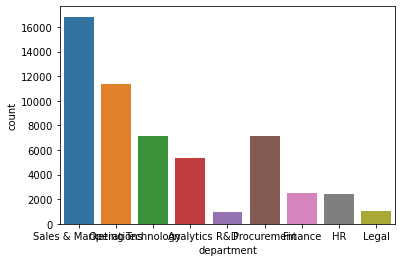

In [186]:
#'department', 'region', 'education', 'gender', 'recruitment_channel'
univar(data,'department')

value count and %
            Count  percentage
region_2   12343       22.52
region_22   6428       11.73
region_7    4843        8.84
region_15   2808        5.12
region_13   2648        4.83
region_26   2260        4.12
region_31   1935        3.53
region_4    1703        3.11
region_27   1659        3.03
region_16   1465        2.67
region_28   1318        2.40
region_11   1315        2.40
region_23   1175        2.14
region_29    994        1.81
region_32    945        1.72
region_19    874        1.59
region_20    850        1.55
region_14    827        1.51
region_25    819        1.49
region_17    796        1.45
region_5     766        1.40
region_6     690        1.26
region_30    657        1.20
region_8     655        1.20
region_10    648        1.18
region_1     610        1.11
region_24    508        0.93
region_12    500        0.91
region_9     420        0.77
region_21    411        0.75
region_3     346        0.63
region_34    292        0.53
region_33    269        

{'missing': 0,
 'unique category': ['region_7',
  'region_22',
  'region_19',
  'region_23',
  'region_26',
  'region_2',
  'region_20',
  'region_34',
  'region_1',
  'region_4',
  'region_29',
  'region_31',
  'region_15',
  'region_14',
  'region_11',
  'region_5',
  'region_28',
  'region_17',
  'region_13',
  'region_16',
  'region_25',
  'region_10',
  'region_27',
  'region_30',
  'region_12',
  'region_21',
  'region_8',
  'region_32',
  'region_6',
  'region_33',
  'region_24',
  'region_3',
  'region_9',
  'region_18'],
 'unique_count': 34}

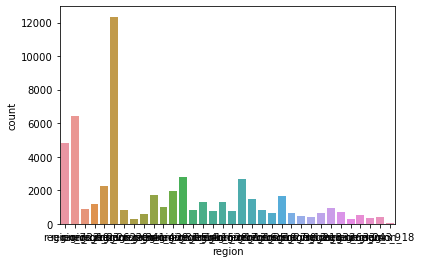

In [187]:
#'region', 'education', 'gender', 'recruitment_channel'
univar(data, "region")

value count and %
                   Count  percentage
Bachelor's        36669       69.98
Master's & above  14925       28.48
Below Secondary     805        1.54


{'missing': 2409,
 'unique category': ["Master's & above", "Bachelor's", nan, 'Below Secondary'],
 'unique_count': 3}

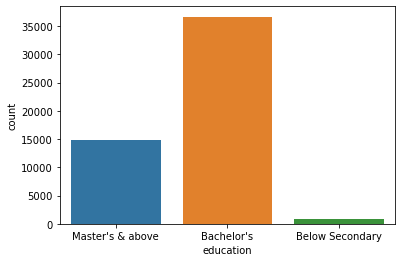

In [188]:
#'education', 'gender', 'recruitment_channel'
univar(data, "education")

In [189]:
data["education"].mode()

0    Bachelor's
Name: education, dtype: object

In [190]:
data["education"]=data["education"].replace(np.nan,"Bachelor's")

value count and %
                   Count  percentage
Bachelor's        39078       71.30
Master's & above  14925       27.23
Below Secondary     805        1.47


{'missing': 0,
 'unique category': ["Master's & above", "Bachelor's", 'Below Secondary'],
 'unique_count': 3}

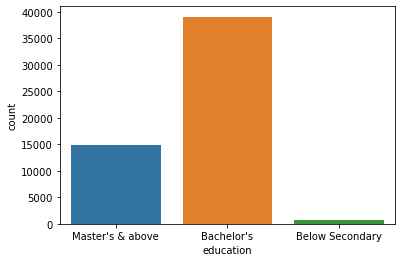

In [191]:
univar(data, "education")

value count and %
    Count  percentage
m  38496       70.24
f  16312       29.76


{'missing': 0, 'unique category': ['f', 'm'], 'unique_count': 2}

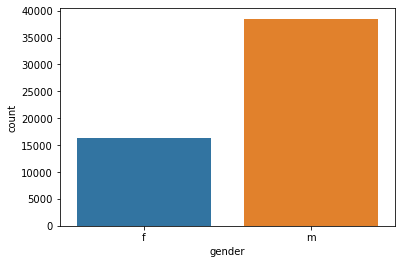

In [192]:
#'gender', 'recruitment_channel'
univar(data,"gender")

In [193]:
data["gender"]=data["gender"].map({"m":1,
                                  "f":0})

value count and %
           Count  percentage
other     30446       55.55
sourcing  23220       42.37
referred   1142        2.08


{'missing': 0,
 'unique category': ['sourcing', 'other', 'referred'],
 'unique_count': 3}

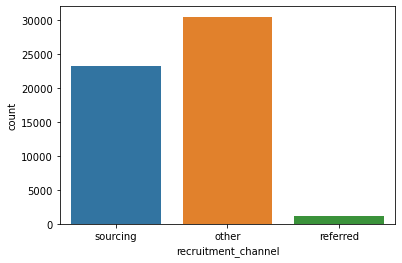

In [194]:
univar(data,"recruitment_channel")

In [195]:
data.dtypes[data.dtypes!="object"].index

Index(['gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

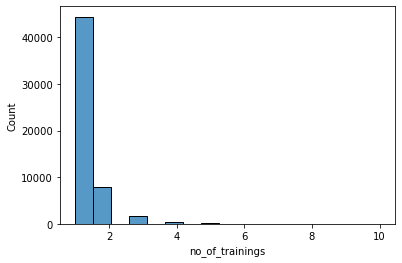

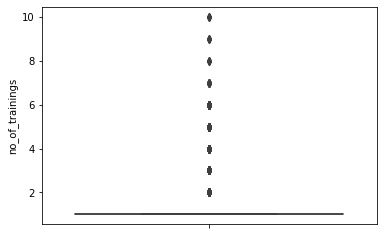

{'Missing Value': 0,
 'Minimum value': 1,
 'Maximum value': 10,
 'Mean value': 1.25,
 'Variance': 0.37,
 'Standard Deviation': 0.61,
 'Range': 9,
 'Quantile1': 1.0,
 'Quantile2': 1.0,
 'Quantile3': 1.0,
 'Skewness': 3.45,
 'kurtosis': 18.74}

In [196]:
#'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       #'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'
univar_num(data,"no_of_trainings")

value count and %
     Count  percentage
1   44378       80.97
2    7987       14.57
3    1776        3.24
4     468        0.85
5     128        0.23
6      44        0.08
7      12        0.02
8       5        0.01
10      5        0.01
9       5        0.01


{'missing': 0,
 'unique category': [1, 2, 3, 4, 7, 5, 6, 8, 10, 9],
 'unique_count': 10}

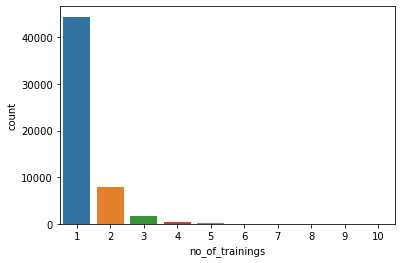

In [197]:
univar(data,"no_of_trainings")

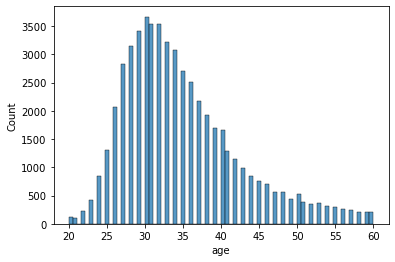

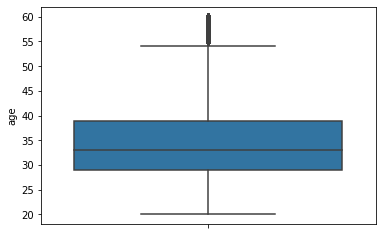

{'Missing Value': 0,
 'Minimum value': 20,
 'Maximum value': 60,
 'Mean value': 34.8,
 'Variance': 58.68,
 'Standard Deviation': 7.66,
 'Range': 40,
 'Quantile1': 29.0,
 'Quantile2': 33.0,
 'Quantile3': 39.0,
 'Skewness': 1.01,
 'kurtosis': 0.79}

In [198]:
univar_num(data,"age")

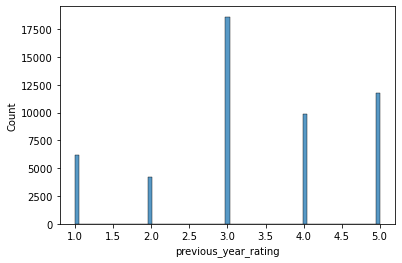

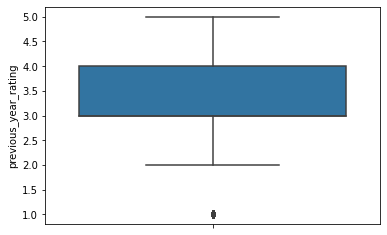

{'Missing Value': 4124,
 'Minimum value': 1.0,
 'Maximum value': 5.0,
 'Mean value': 3.33,
 'Variance': 1.59,
 'Standard Deviation': 1.26,
 'Range': 4.0,
 'Quantile1': 3.0,
 'Quantile2': 3.0,
 'Quantile3': 4.0,
 'Skewness': -0.31,
 'kurtosis': -0.73}

In [199]:
univar_num(data,"previous_year_rating")

value count and %
      Count  percentage
3.0  18618       36.73
5.0  11741       23.17
4.0   9877       19.49
1.0   6223       12.28
2.0   4225        8.34


{'missing': 4124,
 'unique category': [5.0, 3.0, 1.0, 4.0, nan, 2.0],
 'unique_count': 5}

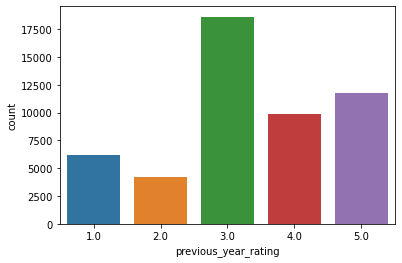

In [200]:
univar(data,"previous_year_rating")

***In this we have missing value hence filling that through median value 
And I am not dropping the missing values here***

In [201]:
data["previous_year_rating"].fillna(data["previous_year_rating"].median(),inplace=True)

value count and %
      Count  percentage
3.0  22742       41.49
5.0  11741       21.42
4.0   9877       18.02
1.0   6223       11.35
2.0   4225        7.71


{'missing': 0, 'unique category': [5.0, 3.0, 1.0, 4.0, 2.0], 'unique_count': 5}

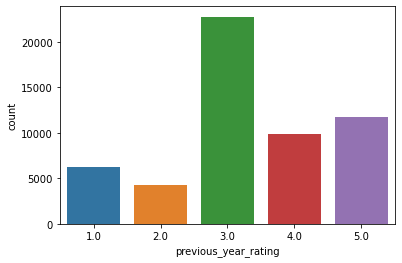

In [202]:
univar(data,"previous_year_rating")

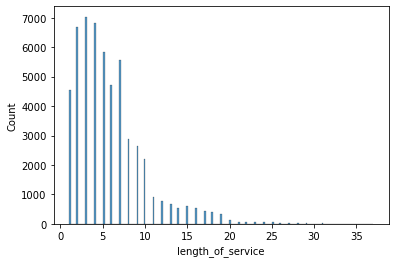

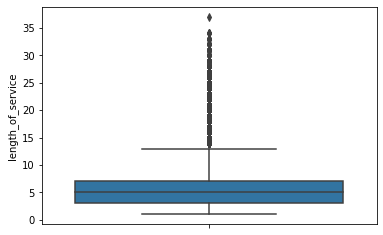

{'Missing Value': 0,
 'Minimum value': 1,
 'Maximum value': 37,
 'Mean value': 5.87,
 'Variance': 18.19,
 'Standard Deviation': 4.27,
 'Range': 36,
 'Quantile1': 3.0,
 'Quantile2': 5.0,
 'Quantile3': 7.0,
 'Skewness': 1.74,
 'kurtosis': 4.41}

In [203]:
univar_num(data,"length_of_service")

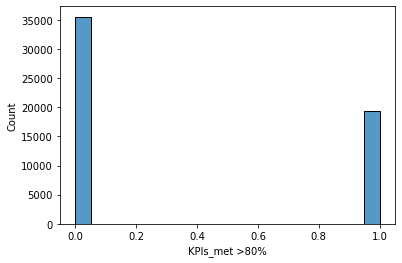

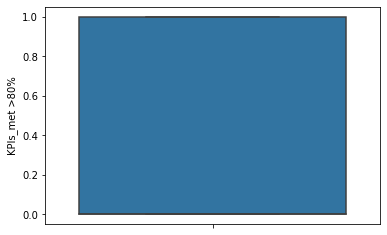

{'Missing Value': 0,
 'Minimum value': 0,
 'Maximum value': 1,
 'Mean value': 0.35,
 'Variance': 0.23,
 'Standard Deviation': 0.48,
 'Range': 1,
 'Quantile1': 0.0,
 'Quantile2': 0.0,
 'Quantile3': 1.0,
 'Skewness': 0.62,
 'kurtosis': -1.62}

In [204]:
univar_num(data,"KPIs_met >80%")

value count and %
    Count  percentage
0  35517        64.8
1  19291        35.2


{'missing': 0, 'unique category': [1, 0], 'unique_count': 2}

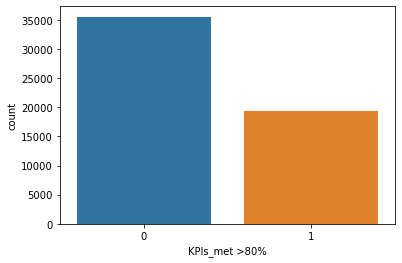

In [205]:
univar(data,"KPIs_met >80%")

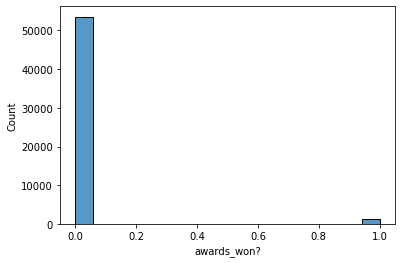

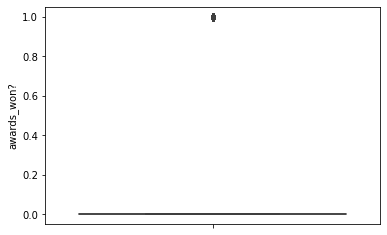

{'Missing Value': 0,
 'Minimum value': 0,
 'Maximum value': 1,
 'Mean value': 0.02,
 'Variance': 0.02,
 'Standard Deviation': 0.15,
 'Range': 1,
 'Quantile1': 0.0,
 'Quantile2': 0.0,
 'Quantile3': 0.0,
 'Skewness': 6.34,
 'kurtosis': 38.18}

In [206]:
univar_num(data,"awards_won?")

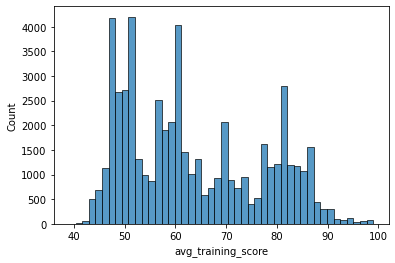

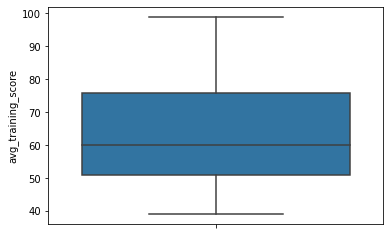

{'Missing Value': 0,
 'Minimum value': 39,
 'Maximum value': 99,
 'Mean value': 63.39,
 'Variance': 178.8,
 'Standard Deviation': 13.37,
 'Range': 60,
 'Quantile1': 51.0,
 'Quantile2': 60.0,
 'Quantile3': 76.0,
 'Skewness': 0.45,
 'kurtosis': -1.05}

In [207]:
#'avg_training_score', 'is_promoted'
univar_num(data,"avg_training_score")

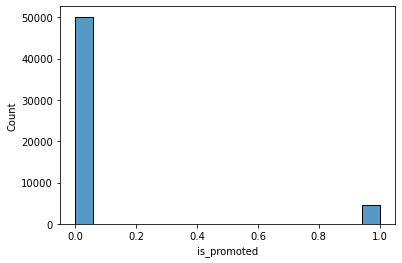

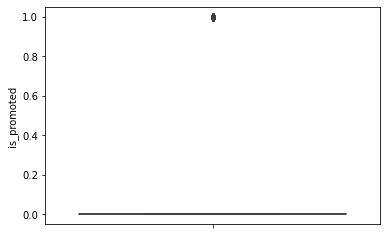

{'Missing Value': 0,
 'Minimum value': 0,
 'Maximum value': 1,
 'Mean value': 0.09,
 'Variance': 0.08,
 'Standard Deviation': 0.28,
 'Range': 1,
 'Quantile1': 0.0,
 'Quantile2': 0.0,
 'Quantile3': 0.0,
 'Skewness': 2.97,
 'kurtosis': 6.84}

In [208]:
univar_num(data,"is_promoted")

value count and %
    Count  percentage
0  50140       91.48
1   4668        8.52


{'missing': 0, 'unique category': [0, 1], 'unique_count': 2}

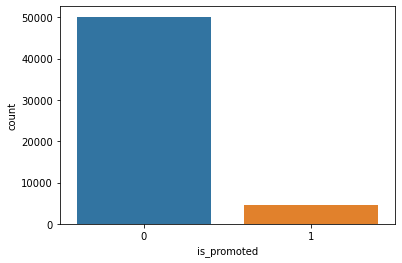

In [209]:
univar(data,"is_promoted")

**It is an imbalance class problem hence need to treat that while doing model**

#### Bivariate

In [210]:
pd.crosstab(data["education"],data["is_promoted"], normalize="columns")

is_promoted,0,1
education,,
Bachelor's,0.716953,0.670523
Below Secondary,0.014719,0.014353
Master's & above,0.268329,0.315124


**Based on columns, I can say that people who have done Bachelor's has been promoted mostly**

In [211]:
#'department', 'region', 'education', 'gender', 'recruitment_channel'
pd.crosstab(data["department"],data["is_promoted"],normalize="columns")

is_promoted,0,1
department,,
Analytics,0.096530,0.109683
Finance,0.046470,0.044130
HR,0.045513,0.029135
Legal,0.019665,0.011354
Operations,0.205923,0.219152
Procurement,0.128640,0.147386
R&D,0.018548,0.014781
Sales & Marketing,0.311667,0.259854
Technology,0.127044,0.164524


***Based on columns, I can say that Sales and Marketing employees has been promoted the most***

In [212]:
pd.crosstab(data["region"],data["is_promoted"],normalize="columns")

is_promoted,0,1
region,,
region_1,0.011009,0.012425
region_10,0.011907,0.010925
region_11,0.024751,0.015853
region_12,0.009314,0.007069
region_13,0.048225,0.049272
region_14,0.015257,0.013282
region_15,0.051576,0.047558
region_16,0.027184,0.021851
region_17,0.013702,0.023350


In [213]:
pd.crosstab(data["gender"],data["is_promoted"],normalize="columns")

is_promoted,0,1
gender,,
0,0.296071,0.314267
1,0.703929,0.685733


**Based on columns wise, I can say that male has been promoted the most**

In [214]:
pd.crosstab(data["recruitment_channel"],data["is_promoted"], normalize="columns")

is_promoted,0,1
recruitment_channel,,
other,0.556243,0.547558
referred,0.020024,0.029563
sourcing,0.423734,0.422879


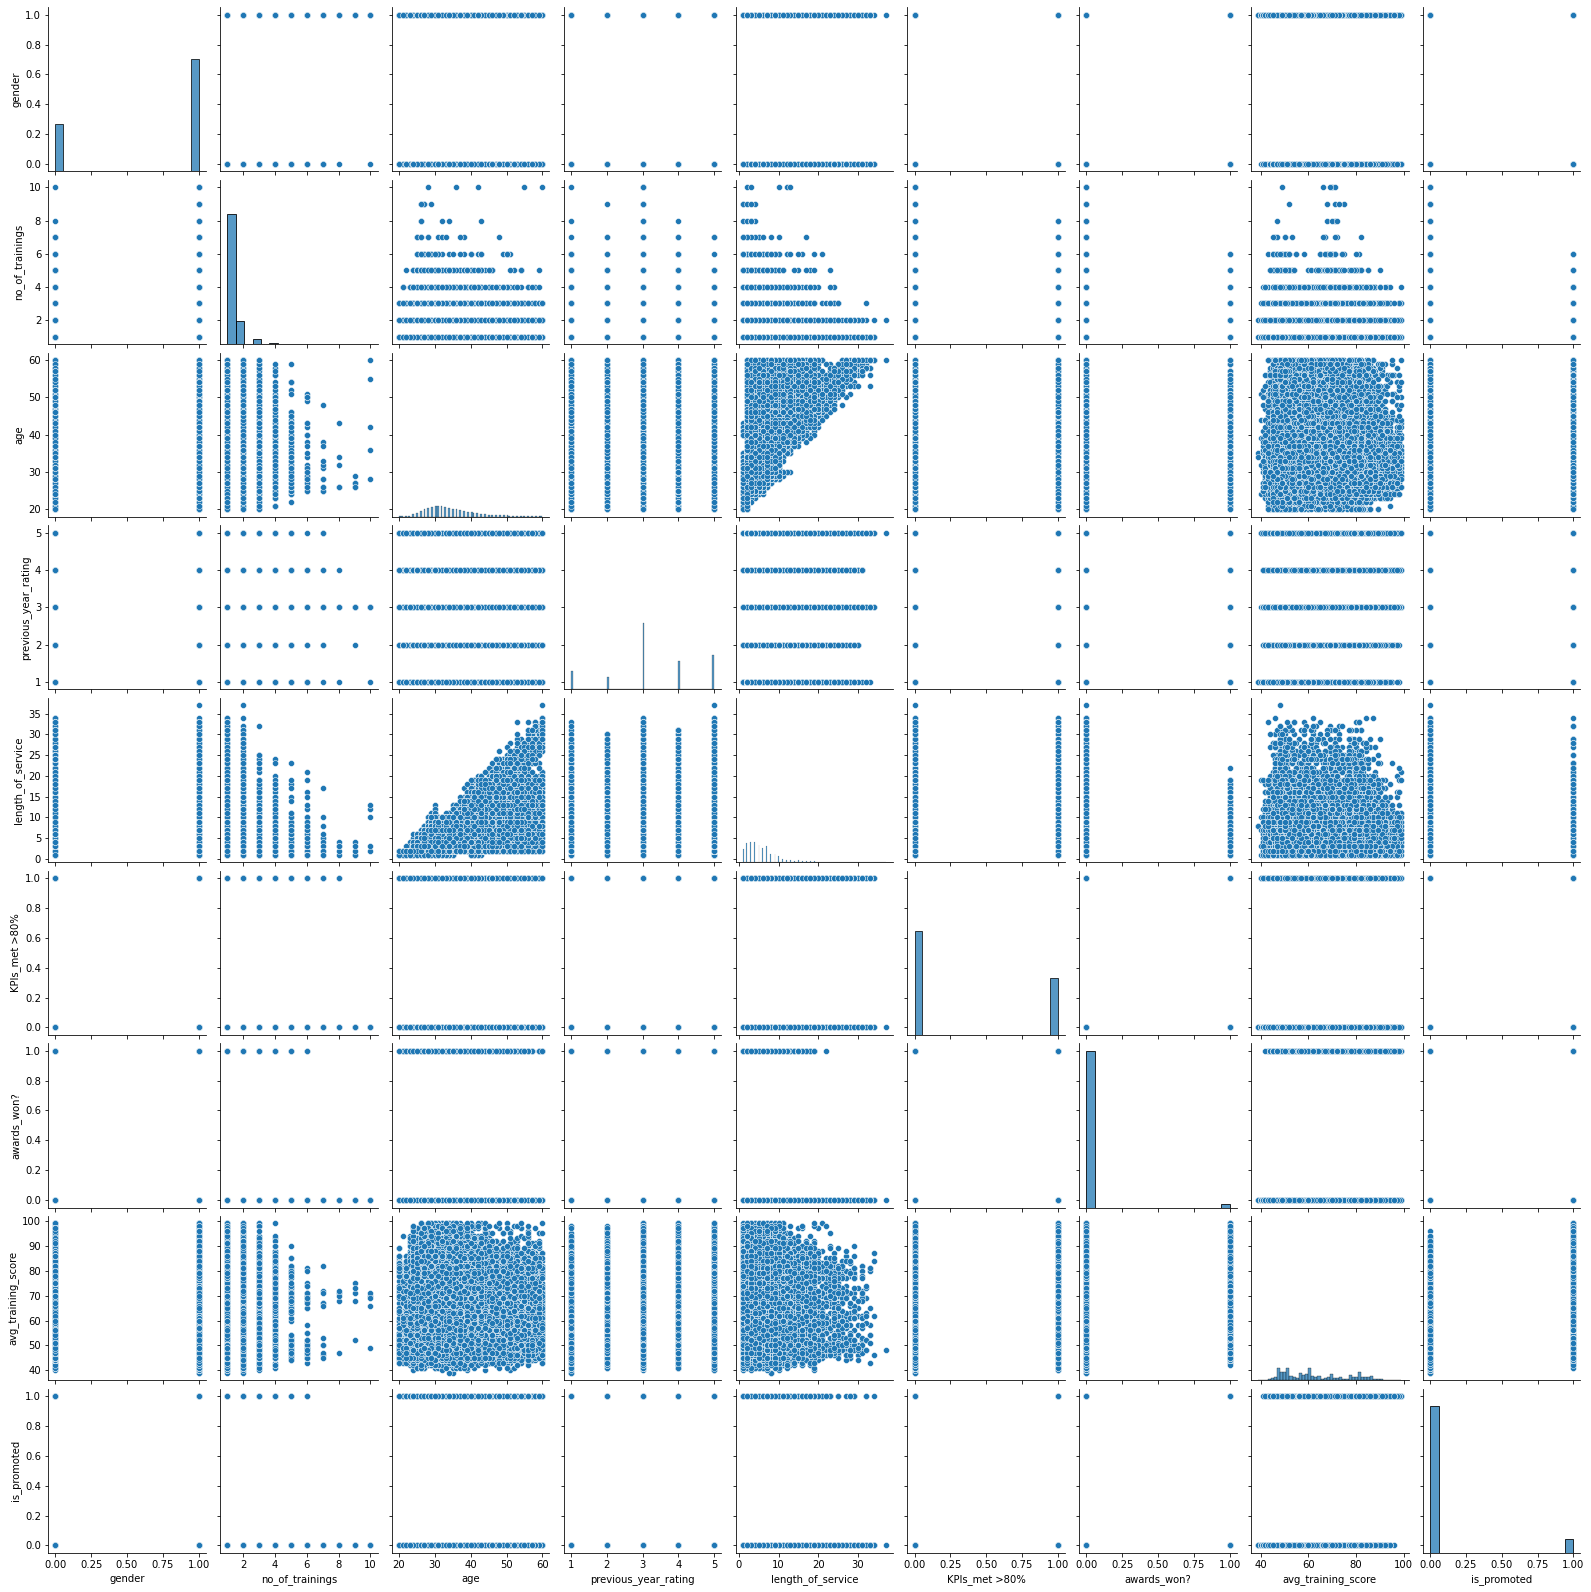

In [215]:
sns.pairplot(data)
plt.show()

#### Outliers

In [216]:
data.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
gender,54808.0,0.702379,0.457216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,4.0,10.0
age,54808.0,34.803915,7.660169,20.0,23.0,24.0,24.0,25.0,25.0,27.0,29.0,33.0,39.0,46.0,51.0,52.0,54.0,56.0,58.0,60.0
previous_year_rating,54808.0,3.304481,1.214770,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,5.0,7.0,11.0,15.0,16.0,17.0,18.0,20.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,44.0,45.0,46.0,46.0,47.0,48.0,51.0,60.0,76.0,83.0,86.0,86.0,87.0,88.0,91.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


As I can check from the percentile method, length of service and avg_training_score has outliers hence need to treat that


In [217]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    return x

In [218]:
num= ["avg_training_score","length_of_service"]
num1=data[num]

In [219]:
cat= data.drop(columns=num1)

In [220]:
data1= num1.apply(outliers)

In [221]:
data2= pd.concat([data1,cat],axis=1)

In [222]:
data2

,avg_training_score,length_of_service,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
employee_id,,,,,,,,,,,,,
65438,49.0,8.0,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,1,0,0
65141,60.0,4.0,Operations,region_22,Bachelor's,1,other,1,30,5.0,0,0,0
7513,50.0,7.0,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,0,0,0
2542,50.0,10.0,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,0,0,0
48945,73.0,2.0,Technology,region_26,Bachelor's,1,other,1,45,3.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,78.0,17.0,Technology,region_14,Bachelor's,1,sourcing,1,48,3.0,0,0,0
74592,56.0,6.0,Operations,region_27,Master's & above,0,other,1,37,2.0,0,0,0
13918,79.0,3.0,Analytics,region_1,Bachelor's,1,other,1,27,5.0,1,0,0


In [223]:
data2.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
avg_training_score,54808.0,63.355459,13.300741,39.0,44.0,45.0,46.0,46.0,47.0,48.0,51.0,60.0,76.0,83.0,86.0,86.0,87.0,88.0,91.0,91.0
length_of_service,54808.0,5.818293,4.063932,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,5.0,7.0,11.0,15.0,16.0,17.0,18.0,20.0,20.0
gender,54808.0,0.702379,0.457216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,4.0,10.0
age,54808.0,34.803915,7.660169,20.0,23.0,24.0,24.0,25.0,25.0,27.0,29.0,33.0,39.0,46.0,51.0,52.0,54.0,56.0,58.0,60.0
previous_year_rating,54808.0,3.304481,1.214770,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


**Outliers has been removed**

#### Multicollinearity

In [224]:
cr=data2.corr()

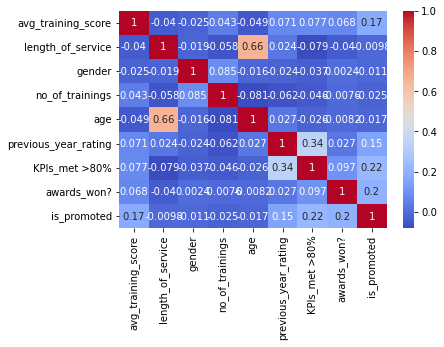

In [225]:
cr1= cr[abs(cr)>.6]
sns.heatmap(cr,annot=True,cmap="coolwarm")
plt.show()

* **from here I can say that age and length of services are correlated**
* **And I can say that kPI and previous year rating are also correlated but they do not have high correlation**

*I am creating dummy by using one-hot-encoder*

In [226]:
data_final=pd.get_dummies(data2,drop_first=True)

In [227]:
data_final.columns

Index(['avg_training_score', 'length_of_service', 'gender', 'no_of_trainings',
       'age', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?',
       'is_promoted', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_region_34', 'region_region_4', 're

* **As I have done with the EDA & Preprocessing**
* **Need to evaluate the model as it is an `imbalance class` problem need to solve that**
* **We can solve it by using the techniques like `oversampling, undersampling, near miss, SMOTE` and the `decission tree & random forest works better in imbalance class problem`.**